# Introduction

This project will scope, analyzem prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

-What is the distribution of conservation statis to species?
-Are certain types of species more likely to be endangered?
-Are the differences between species and their conservation status significant?
-Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Import Python Modules

First, import thr primary modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Data

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [2]:
species = pd.read_csv("species_info.csv",encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days 

In [3]:
observations = pd.read_csv("observations.csv",encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
# check dimensions of the data sets

print(f"species shape:{species.shape}")
print(f"observations shape:{observations.shape}")

species shape:(5824, 4)
observations shape:(23296, 3)


## Explore the Data

#### explore the `species`


In [5]:
print(f"number of scientific name: {species.scientific_name.nunique()}")

print(f"number of distinct categories: {species.category.nunique()}")
print(f"category: {species.category.unique()}")

number of scientific name: 5541
number of distinct categories: 7
category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
print(f"number of statuses: {species.conservation_status.nunique()}")
print(f"conservation unique statuses: {species.conservation_status.unique()}")

number of statuses: 4
conservation unique statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [8]:
print(f"na values: {species.conservation_status.isna().sum()}")
species.groupby("conservation_status").size()

na values: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

#### explore the `observations`

In [9]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks: {observations.park_name.unique()}")

print("\number of observations: ")
observations.observations.sum()

number of parks:4
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

umber of observations: 


3314739

## Analysis

First task I clean and explore the `conservation_status` column in `species`
a lot of `nan` values were detected. I converted to `No intervention`

In [10]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the No Intervation

In [11]:
conservationCategory = species[species.conservation_status != "No Intervetion"].groupby(["conservation_status","category"])["scientific_name"].count().unstack()
conservationCategory                               

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

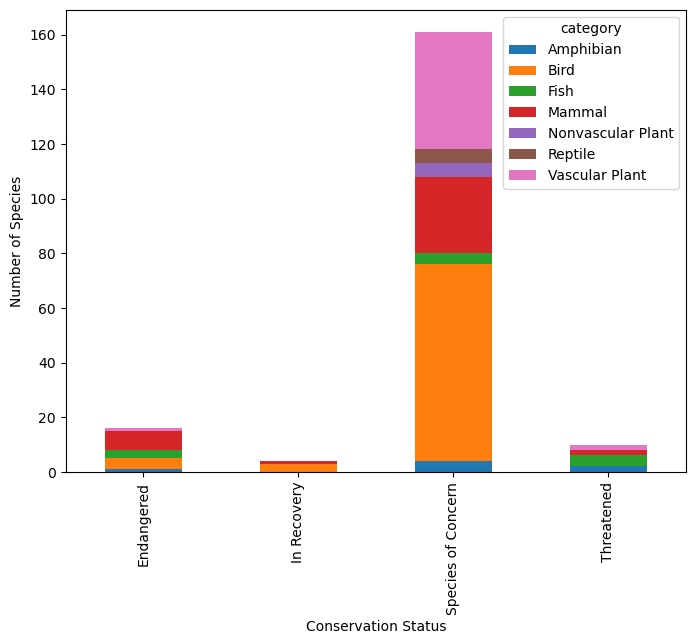

In [12]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

In [13]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.is_protected.count()

5824

#### create new column to show the protection status

In [ ]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()

print(category_counts)

# rename column 
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

#### calculate the rate of protection 

In [20]:
category_counts["percent_protected"] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical Significance

This section I ran some chi-squared tests to see if different species have statistically significant differences in conservation rates.

Conitngency Table Frequencies:

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|fish|11|115

The first test will be called `contingency1` and will test between Mamml and fish.

In [23]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [11, 115]]
chi2_contingency(contingency1)

# The p value is 0.056 which is greater than 0.05 means that deviation form the null hypothesis is not statistically significant. 

Chi2ContingencyResult(statistic=3.647651024981415, pvalue=0.0561483484489001, dof=1, expected_freq=array([[ 23.89403974, 152.10596026],
       [ 17.10596026, 108.89403974]]))

The next pair, is going to test between Amphibian and Reptile

Conitngency Table Frequencies:

||protected|not protected|
|-|-|-|
|Amphibian|7|72|
|Reptile|5|73|

This will be called `contingency2`.\
the p value = 0.78 we cannot conclude that a significant difference exists.

In [32]:
contingency2 = [[7,72],
               [5,73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=0.07696702910310493, pvalue=0.7814504686518953, dof=1, expected_freq=array([[ 6.03821656, 72.96178344],
       [ 5.96178344, 72.03821656]]))

#### Species in Parks

The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset

In [36]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Bird"].common_names.apply(remove_punctuations).str.split().tolist()

common_Names[:10]

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk'],
 ['RedShouldered', 'Hawk'],
 ['BroadWinged', 'Hawk'],
 ['Northern', 'Harrier'],
 ['American', 'SwallowTailed', 'Kite', 'SwallowTailed', 'Kite']]

#### collapse the words into one list and count the number of occurrences

In [41]:
word_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in common_Names))
                 
word_list[:10]

['Brewsters',
 'Warbler',
 'Coopers',
 'Hawk',
 'Northern',
 'Goshawk',
 'SharpShinned',
 'Hawk',
 'Golden',
 'Eagle']

In [45]:
word_count = []

for i in word_list:
    x = word_list.count(i)
    word_count.append((i, x))
    
pd.DataFrame(set(word_count), columns=["Word", "Count"]).sort_values("Count", ascending=False).head(10)   

,Word,Count
18,Warbler,60
42,Sparrow,30
419,Northern,21
421,American,21
321,Flycatcher,19
339,Owl,19
298,Common,18
81,Woodpecker,13
241,Western,13
324,Great,11


The next task is to figure out which rows of species are referring to Warbler.

In [52]:
species["is_Warbler"] = species.common_names.str.contains(r"\bWarbler\b", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_Warbler
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [53]:
species[species.is_Warbler]

,category,scientific_name,common_names,conservation_status,is_protected,is_Warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,No Intervention,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,No Intervention,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,No Intervention,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,No Intervention,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,No Intervention,False,True
251,Bird,Dendroica discolor,Prairie Warbler,No Intervention,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,No Intervention,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,No Intervention,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,No Intervention,False,True
255,Bird,Dendroica palmarum,Palm Warbler,No Intervention,False,True


In [54]:
warbler_observations = observations.merge(species[species.is_Warbler])
warbler_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_Warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,No Intervention,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,No Intervention,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,No Intervention,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,No Intervention,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,No Intervention,False,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,No Intervention,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,No Intervention,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,No Intervention,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,No Intervention,False,True


Let's see how many total warbler observations(across all species) were made at each national park.  

In [55]:
warbler_observations.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


Now let's see each park broken down by protected warblers vs. non-protected warblers sightings.

In [59]:
observation_by_park = warbler_observations.groupby(["park_name","is_protected"]).observations.sum().reset_index()
observation_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


Below is a plot from the output of the last data manipulation.
From this chart we can seem a lot non-protected species.

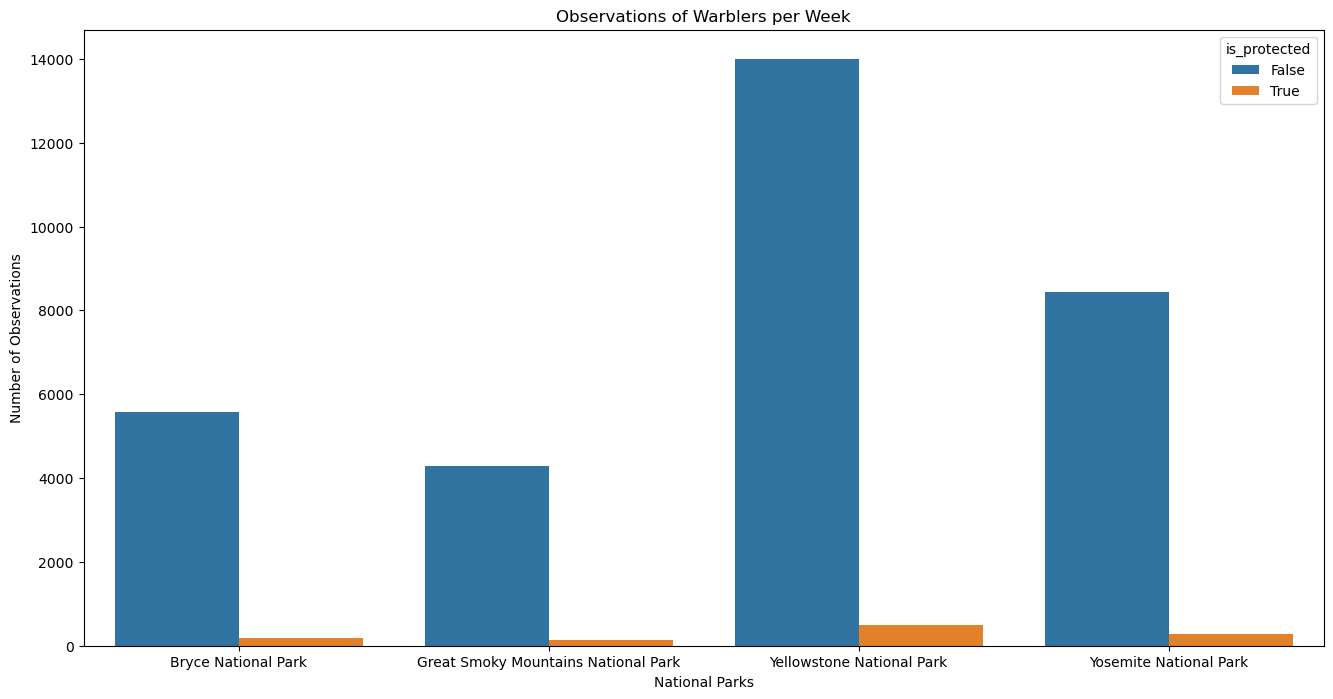

In [65]:
plt.figure(figsize=(16,8))
sns.barplot(x=observation_by_park.park_name, y = observation_by_park.observations, hue=observation_by_park.is_protected)
plt.xlabel("National Parks")
plt.ylabel("Number of Observations")
plt.title("Observations of Warblers per Week")
plt.show()